In [36]:
import pandas as pd
from io import StringIO

# Your markdown data
markdown_data = """| DETR BBOX Model | Precision | Recall | MAE_x | P (PT) | R (PT) | MAE_x (PT) |
| --------------- | --------- | ------ | ----- | ------ | ------ | ---------- |
| 10x10           | 0.138     | 0.373  | 0.41   | 0.42   | 0.46   | 1.30       |
| 15x15           | 0.384     | 0.526  | 0.87  | 0.59   | 0.64   | 1.77       |
| 20x20           | 0.618     | 0.615  | 1.21   | 0.67   | 0.74   | 2.11       |
| 25x25           | 0.731     | 0.672  | 1.92   | 0.71   | 0.78   | 2.29       |
| 50x50           | 0.724     | 0.785  | 2.34  | 0.77   | 0.84   | 2.79       |
| 100x100         | 0.788     | 0.867  | 5.25  | 0.79   | 0.86   | 3.27       |
| 150x150         | 0.796     | 0.892  | 9.79  | 0.80   | 0.87   | 3.77       |
| 200x200         | 0.807     | 0.906  | 13.74 | 0.80   | 0.88   | 4.04       |
| 250x250         | 0.815     | 0.920  | 19.00 | 0.80   | 0.88   | 4.17       |
| 300x300         | 0.821     | 0.898  | 23.63 | 0.81   | 0.89   | 4.81       |
| 400x400         | 0.837     | 0.904  | 32.29 | 0.82   | 0.89   | 5.76       |"""

# Create a pandas DataFrame
df = pd.read_csv(StringIO(markdown_data), sep="|", skiprows=[1], skipinitialspace=True)

# Remove leading and trailing whitespaces from column names
df.columns = [col.strip() for col in df.columns]
df = df.drop(columns=['Unnamed: 0'])
df = df.drop(columns=['Unnamed: 8'])

# new column size which is the DETR BBOX Model column split into two columns
df['size'] = df['DETR BBOX Model'].str.split('x', expand=True)[0]

df['f1'] = 2 * (df['Precision'] * df['Recall']) / (df['Precision'] + df['Recall'])
df['f1_pt'] = 2 * (df['P (PT)'] * df['R (PT)']) / (df['P (PT)'] + df['R (PT)'])

df = df.drop(columns=['DETR BBOX Model'])

# Display the DataFrame
df

,Precision,Recall,MAE_x,P (PT),R (PT),MAE_x (PT),size,f1,f1_pt
0,0.138,0.373,0.41,0.42,0.46,1.30,10,0.201464,0.439091
1,0.384,0.526,0.87,0.59,0.64,1.77,15,0.443921,0.613984
2,0.618,0.615,1.21,0.67,0.74,2.11,20,0.616496,0.703262
3,0.731,0.672,1.92,0.71,0.78,2.29,25,0.700259,0.743356
4,0.724,0.785,2.34,0.77,0.84,2.79,50,0.753267,0.803478
5,0.788,0.867,5.25,0.79,0.86,3.27,100,0.825615,0.823515
6,0.796,0.892,9.79,0.80,0.87,3.77,150,0.841270,0.833533
7,0.807,0.906,13.74,0.80,0.88,4.04,200,0.853639,0.838095
8,0.815,0.920,19.00,0.80,0.88,4.17,250,0.864323,0.838095
9,0.821,0.898,23.63,0.81,0.89,4.81,300,0.857775,0.848118


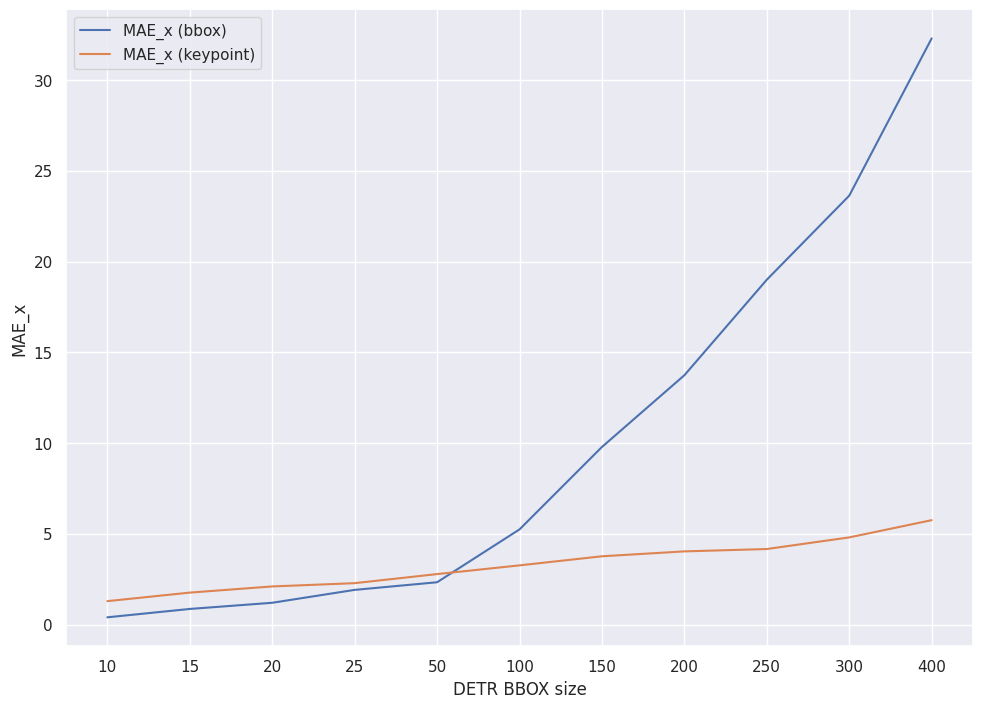

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# plot MAE_x vs DETR BBOX Model
plt.plot(np.array(df['size']), np.array(df['MAE_x']), label='MAE_x (bbox)')
plt.plot(np.array(df['size']), np.array(df['MAE_x (PT)']), label='MAE_x (keypoint)')
plt.xlabel('DETR BBOX size')
plt.ylabel('MAE_x')

plt.legend()

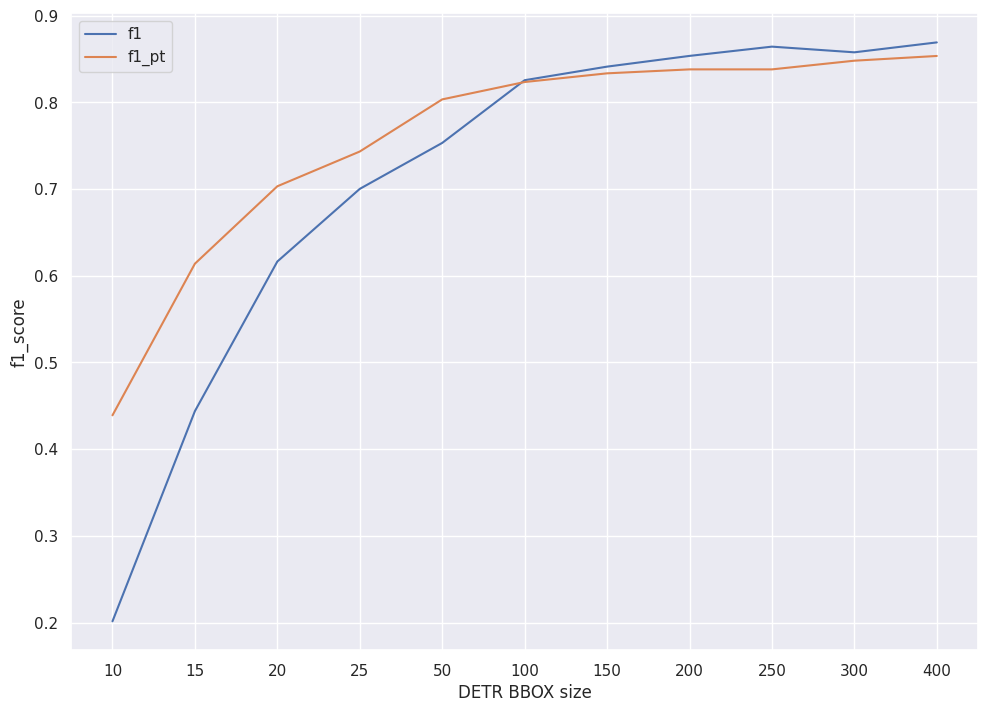

In [38]:
# plot f1_score vs size for both models
plt.plot(np.array(df['size']), np.array(df['f1']), label='f1 score (bbox)')
plt.plot(np.array(df['size']), np.array(df['f1_pt']), label='f1 score (keypoint)')
plt.xlabel('DETR BBOX size')
plt.ylabel('f1_score')

plt.legend()